# Customer Churn Model Training using ANN

## Introduction

This notebook demonstrates the implementation of an Artificial Neural Network (ANN) to predict whether a bank customer will exit (churn) based on various features. The process involves data preprocessing, feature encoding, model building, training, and evaluation.

---

### 1. Load the Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle

In [2]:
## Load the dataset
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We start by loading the dataset containing customer information and their churn status.

---

### 2. Data Preprocessing

Drop Irrelevant Columns

In [3]:
## Preprocess the data
### Drop irrelevant columns
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


We remove columns that do not contribute to prediction, such as `RowNumber`, `CustomerId`, and `Surname`.

---

#### 2.1 Encode Categorical Variables

Encode Gender

In [4]:
## Encode categorical variables
label_encoder_gender=LabelEncoder()
data['Gender']=label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


The Gender column is transformed into numerical format using LabelEncoder.

---

#### 2.2 One-Hot Encode Geography

In [5]:
## Onehot encode 'Geography
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geo=OneHotEncoder()
geo_encoder=onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [6]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [7]:
geo_encoded_df=pd.DataFrame(geo_encoder,columns=onehot_encoder_geo.get_feature_names_out(['Geography']))
geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [8]:
## Combine one hot encoder columns with the original data
data=pd.concat([data.drop('Geography',axis=1),geo_encoded_df],axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


The Geography column is one-hot encoded to create separate binary columns for each country.

---

### 3. Save Encoders and Scaler

In [9]:
## Save the encoders and sscaler
with open('label_encoder_gender.pkl','wb') as file:
    pickle.dump(label_encoder_gender,file)

with open('onehot_encoder_geo.pkl','wb') as file:
    pickle.dump(onehot_encoder_geo,file)


In [10]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


We save the encoders for future use when processing new data.

---

### 4. Splitting the Dataset

In [11]:
## DiVide the dataset into indepent and dependent features
X=data.drop('Exited',axis=1)
y=data['Exited']

## Split the data in training and tetsing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

We divide the dataset into training and testing sets to evaluate model performance.

---

### 5. Feature Scaling

In [12]:
## Scale these features
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [14]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [15]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


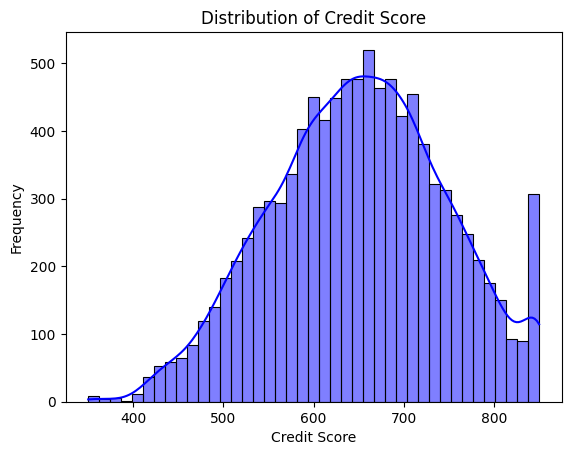

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Credit Score
sns.histplot(data['CreditScore'], kde=True, color='blue')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

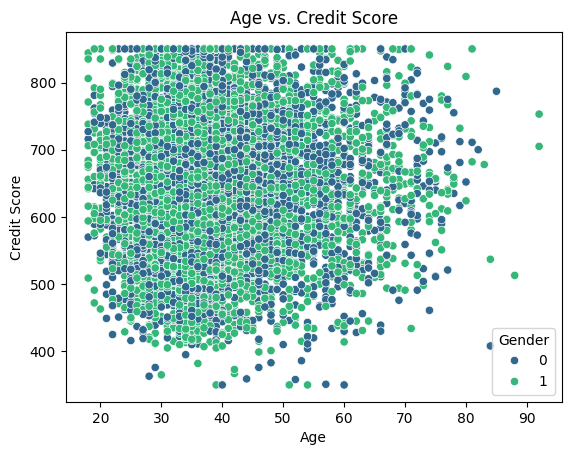

In [36]:
sns.scatterplot(data=data, x='Age', y='CreditScore', hue='Gender', palette='viridis')
plt.title('Age vs. Credit Score')
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.show()

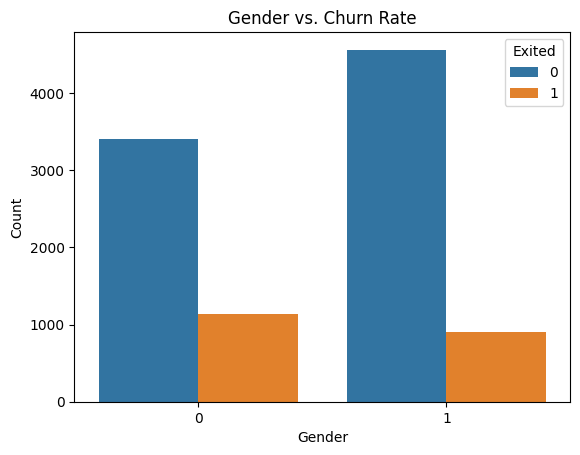

In [39]:
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Gender vs. Churn Rate')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

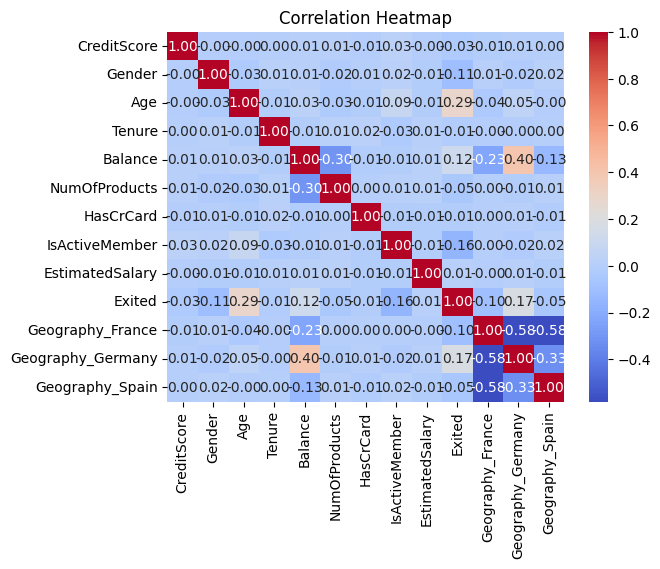

In [40]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

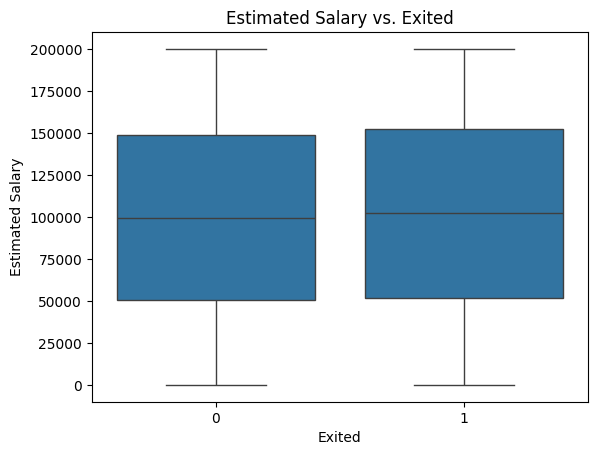

In [41]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Estimated Salary vs. Exited')
plt.xlabel('Exited')
plt.ylabel('Estimated Salary')
plt.show()

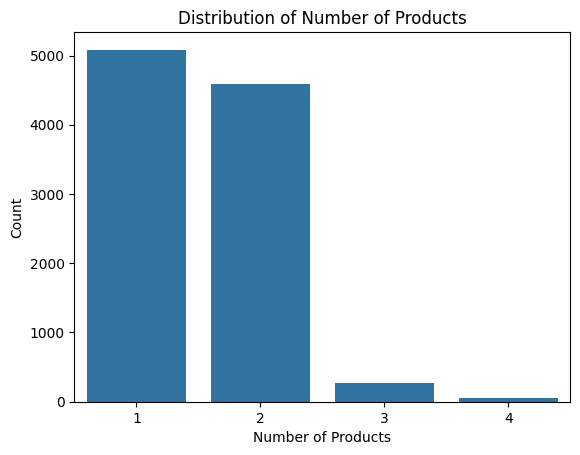

In [42]:
sns.countplot(x='NumOfProducts', data=data)
plt.title('Distribution of Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.show()

The numerical features are standardized to improve ANN performance.

---

### 6. ANN Implementation

#### 6.1 Import TensorFlow and Define Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [17]:
(X_train.shape[1],)

(12,)

In [18]:
## Build Our ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]

)

c:\Users\sagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

A sequential neural network is defined with two hidden layers and an output layer using a sigmoid activation function for binary classification.

#### 6.2 Compile the Model

In [20]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
loss

In [21]:
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])

We compile the model using the Adam optimizer and binary cross-entropy loss function.

#### 6.3 Set Up Callbacks

In [22]:
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [23]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)


We configure TensorBoard for visualization and early stopping to prevent overfitting.

#### 6.4 Train the Model

In [24]:
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8072 - loss: 0.4475 - val_accuracy: 0.8540 - val_loss: 0.3482
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8518 - loss: 0.3560 - val_accuracy: 0.8540 - val_loss: 0.3465
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8615 - loss: 0.3403 - val_accuracy: 0.8590 - val_loss: 0.3431
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.3456 - val_accuracy: 0.8555 - val_loss: 0.3610
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8621 - loss: 0.3420 - val_accuracy: 0.8635 - val_loss: 0.3396
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8671 - loss: 0.3279 - val_accuracy: 0.8600 - val_loss: 0.3450
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8686 - loss: 0.3221 - val_accuracy: 0.8620 - val_loss: 0.3399
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3376 - val_accu

The model is trained with a validation set, and callbacks are used for monitoring.

---

### 7. Save the Model

In [25]:
model.save('model.h5')

The trained ANN model is saved for future inference.

---

### 8. Launch TensorBoard

In [26]:
## Load Tensorboard Extension
%load_ext tensorboard

In [27]:
%tensorboard --logdir logs/fit

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Model with additional layers and regularization
model_2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # HL1
    BatchNormalization(),  # Normalize activations of HL1
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # HL2
    BatchNormalization(),  # Normalize activations of HL2
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # HL3
    BatchNormalization(),  # Normalize activations of HL3
    Dropout(0.3),  # Regularization
    Dense(16, activation='relu'),  # HL4
    BatchNormalization(),  # Normalize activations of HL4
    Dense(8, activation='relu'),  # HL5
    Dense(1, activation='sigmoid')  # Output layer
])

# Compiling the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary to see the architecture
model_2.summary()

c:\Users\sagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,633 (53.25 KB)

 Trainable params: 13,153 (51.38 KB)

 Non-trainable params: 480 (1.88 KB)

In [29]:
### Train the model
history=model_2.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6038 - loss: 0.7093 - val_accuracy: 0.8105 - val_loss: 0.4414
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.4500 - val_accuracy: 0.8360 - val_loss: 0.3828
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8158 - loss: 0.4164 - val_accuracy: 0.8510 - val_loss: 0.3657
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8170 - loss: 0.4032 - val_accuracy: 0.8540 - val_loss: 0.3521
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8276 - loss: 0.4074 - val_accuracy: 0.8575 - val_loss: 0.3496
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8288 - loss: 0.3888 - val_accuracy: 0.8565 - val_loss: 0.3465
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8425 - loss: 0.3710 - val_accuracy: 0.8565 - val_loss: 0.3480
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8344 - loss: 0.3874 - val_accu

In [32]:
import keras_tuner

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.3))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'sgd']), loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials=10)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.8619999885559082

Best val_accuracy So Far: 0.8675000071525574
Total elapsed time: 00h 03m 35s


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt

# Define model search space for Keras Tuner (for ANN)
def build_ann_model(hp):
    model = Sequential([
        Dense(units=hp.Int('units', min_value=64, max_value=512, step=64), activation='relu', input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Keras Tuner for ANN Hyperparameter Search
tuner = kt.RandomSearch(build_ann_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='ann_tuning', project_name='ann_search')
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best ANN model from Keras Tuner
best_ann_model = tuner.get_best_models(num_models=1)[0]

# Hyperparameter tuning for traditional models using GridSearchCV or RandomizedSearchCV

# Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}
rf_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_search.fit(X_train, y_train)

# Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, cv=3, n_jobs=-1, verbose=2)
gb_search.fit(X_train, y_train)

# SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_search = GridSearchCV(SVC(), svm_param_grid, cv=3, n_jobs=-1, verbose=2)
svm_search.fit(X_train, y_train)

# KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=3, n_jobs=-1, verbose=2)
knn_search.fit(X_train, y_train)

# XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
xgb_search = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_param_grid, cv=3, n_jobs=-1, verbose=2)
xgb_search.fit(X_train, y_train)

# Evaluate all models
results = {}

# Evaluate the tuned ANN model
best_ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)
loss, accuracy = best_ann_model.evaluate(X_test, y_test)
results['ANN'] = accuracy

# Evaluate the traditional models
models = {
    "Random Forest": rf_search.best_estimator_,
    "Gradient Boosting": gb_search.best_estimator_,
    "Logistic Regression": LogisticRegression(random_state=42),  # Example, add tuning if needed
    "SVM": svm_search.best_estimator_,
    "KNN": knn_search.best_estimator_,
    "XGBoost": xgb_search.best_estimator_
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results[model_name] = accuracy

# Show comparison results
print("\nModel Comparison:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


Trial 5 Complete [00h 00m 17s]
val_accuracy: 0.8665000001589457

Best val_accuracy So Far: 0.8665000001589457
Total elapsed time: 00h 01m 19s


c:\Users\sagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8518 - loss: 0.3519 - val_accuracy: 0.8580 - val_loss: 0.3421
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8584 - loss: 0.3506 - val_accuracy: 0.8670 - val_loss: 0.3408
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3570 - val_accuracy: 0.8585 - val_loss: 0.3398
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8590 - loss: 0.3401 - val_accuracy: 0.8650 - val_loss: 0.3431
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.3424 - val_accuracy: 0.8530 - val_loss: 0.3437
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -